## Modelling

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
import timeit
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,precision_score,recall_score,RocCurveDisplay
from matplotlib import pyplot

In [2]:
x_resampled=pd.read_csv('resampled_without_encoding.csv')
x_resampled_encoding=pd.read_csv('resampled_with_encoding.csv')
y_resampled=pd.read_csv('y_resampled.csv')

### Data with Resampling and without OneHotEncoding

In [3]:
X = x_resampled.values
Y = np.squeeze(y_resampled.values)
X_train,X_test1,y_train,y_test1=train_test_split(X,Y,test_size=0.2,random_state=10)

In [4]:
scaler = StandardScaler().fit(X_train)
train_sc = scaler.transform(X_train)
test_sc = scaler.transform(X_test1)

In [5]:
model=DecisionTreeClassifier(random_state=23)
start_time = timeit.default_timer()
model.fit(train_sc,y_train)
elapsed = timeit.default_timer() - start_time
print("Time taken to fit the model in sec is ",elapsed)
y_pred1=model.predict(test_sc)

Time taken to fit the model in sec is  20.9806259


In [6]:
print(f"Accuracy score:{accuracy_score(y_test1, y_pred1):.4f}")
print(f"F1 score : {f1_score(y_test1, y_pred1):.4f}")
print(f"Recall score : {recall_score(y_test1, y_pred1):.4f}")
print(f"Precision score : {precision_score(y_test1, y_pred1):.4f}")

Accuracy score:0.9439
F1 score : 0.9448
Recall score : 0.9574
Precision score : 0.9326


<AxesSubplot:>

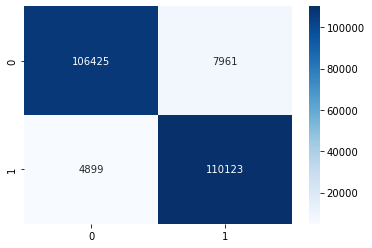

In [7]:

sns.heatmap(confusion_matrix(y_test1,y_pred1),annot=True,fmt='',cmap='Blues')

In [8]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94    114386
           1       0.93      0.96      0.94    115022

    accuracy                           0.94    229408
   macro avg       0.94      0.94      0.94    229408
weighted avg       0.94      0.94      0.94    229408



### Feature Selection

In [9]:
feat_imp = pd.DataFrame({"Col": x_resampled.columns})
feat_imp["Coef"] = model.feature_importances_
#Grouping Encoding features
feat_imp["Col"] = feat_imp["Col"].apply(lambda x: (x.split('cat')[0]+'cat') if 'cat' in x else x)
feat_imp = feat_imp.groupby("Col",as_index=False).sum().sort_values("Coef", ascending=False)
#Scaling weights
feat_imp["FeatImp"] = ((feat_imp["Coef"] - feat_imp["Coef"].min())/ (feat_imp["Coef"].max() - feat_imp["Coef"].min())).round(4)
feat_imp

,Col,Coef,FeatImp
40,ps_ind_08_bin,0.166379,1.0000
51,ps_reg_01,0.096872,0.5822
52,ps_reg_02,0.093433,0.5615
39,ps_ind_07_bin,0.083065,0.4992
41,ps_ind_09_bin,0.073537,0.4419
38,ps_ind_06_bin,0.066082,0.3971
32,ps_car_15,0.041108,0.2470
49,ps_ind_17_bin,0.037687,0.2264
47,ps_ind_15,0.021647,0.1300
50,ps_ind_18_bin,0.021254,0.1276


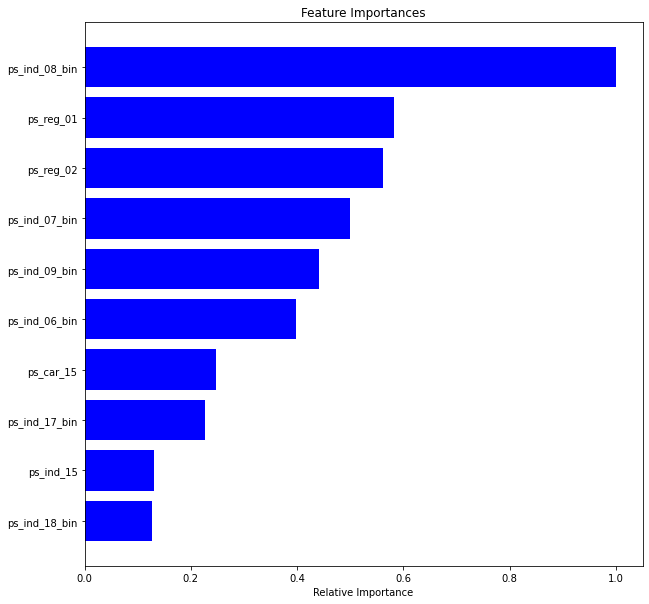

In [10]:
# customized number 
num_features = 10 

pyplot.figure(figsize=(10,10))
pyplot.title('Feature Importances')

# only plot the customized number of features
pyplot.barh(range(num_features), feat_imp['FeatImp'][:num_features][::-1], color='b', align='center')
pyplot.yticks(range(num_features), feat_imp['Col'][:num_features][::-1])
pyplot.xlabel('Relative Importance')
pyplot.show()

In [11]:
model.get_depth()

45

In [12]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 23,
 'splitter': 'best'}

In [13]:
model.get_n_leaves()

37278

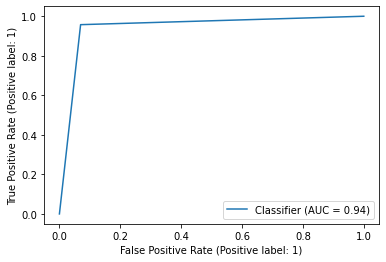

In [14]:
RocCurveDisplay.from_predictions(y_test1, y_pred1)

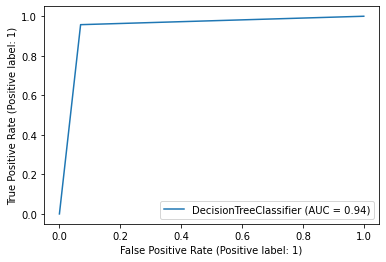

In [15]:
RocCurveDisplay.from_estimator(model, test_sc, y_test1)

### Data with Resampling and with OneHotEncoding

In [16]:
X = x_resampled_encoding.values
Y = y_resampled.values
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [17]:
scaler = StandardScaler().fit(X_train)
train_sc = scaler.transform(X_train)
test_sc = scaler.transform(X_test)

In [18]:
model=DecisionTreeClassifier(random_state=23)
start_time = timeit.default_timer()
model.fit(train_sc,y_train)
elapsed = timeit.default_timer() - start_time
print("Time taken to fit the model in sec is ",elapsed)
y_pred=model.predict(test_sc)

Time taken to fit the model in sec is  49.305185599999994


In [19]:
print(f"Accuracy score:{accuracy_score(y_test, y_pred):.4f}")
print(f"F1 score : {f1_score(y_test, y_pred):.4f}")
print(f"Recall score : {recall_score(y_test, y_pred):.4f}")
print(f"Precision score : {precision_score(y_test, y_pred):.4f}")

Accuracy score:0.9468
F1 score : 0.9475
Recall score : 0.9568
Precision score : 0.9383


<AxesSubplot:>

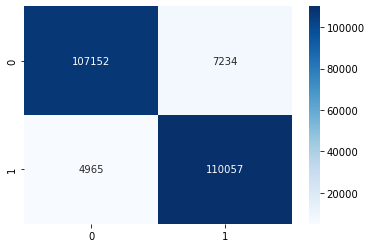

In [20]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='',cmap='Blues')

### Feature Selection

In [21]:
feat_imp = pd.DataFrame({"Col": x_resampled_encoding.columns})
feat_imp["Coef"] = model.feature_importances_
#Grouping Encoding Features
feat_imp["Col"] = feat_imp["Col"].apply(lambda x: (x.split('cat')[0]+'cat') if 'cat' in x else x)
feat_imp = feat_imp.groupby("Col",as_index=False).sum().sort_values("Coef", ascending=False)
#Scaling Weights
feat_imp["FeatImp"] = (
        (feat_imp["Coef"] - feat_imp["Coef"].min())
        / (feat_imp["Coef"].max() - feat_imp["Coef"].min())
    ).round(4)
feat_imp

,Col,Coef,FeatImp
40,ps_ind_08_bin,0.166379,1.0000
51,ps_reg_01,0.095528,0.5741
39,ps_ind_07_bin,0.083065,0.4992
52,ps_reg_02,0.075730,0.4551
41,ps_ind_09_bin,0.073537,0.4419
38,ps_ind_06_bin,0.066082,0.3971
26,ps_car_09_cat,0.042680,0.2565
29,ps_car_11_cat,0.035997,0.2163
49,ps_ind_17_bin,0.032109,0.1929
32,ps_car_15,0.031222,0.1876


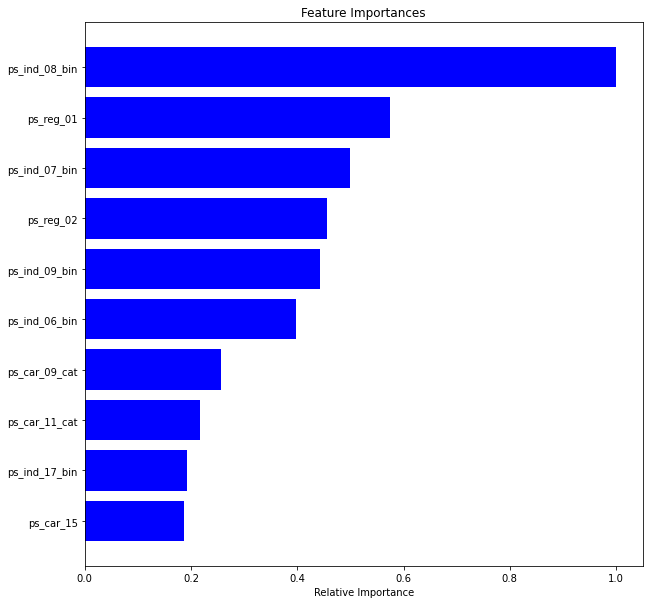

In [22]:
# customized number 
num_features = 10 

pyplot.figure(figsize=(10,10))
pyplot.title('Feature Importances')

# only plot the customized number of features
pyplot.barh(range(num_features), feat_imp['FeatImp'][:num_features][::-1], color='b', align='center')
pyplot.yticks(range(num_features), feat_imp['Col'][:num_features][::-1])
pyplot.xlabel('Relative Importance')
pyplot.show()

### Hyperparameter Tuning
* Finding the best parameters

In [24]:
clf_tree = DecisionTreeClassifier(random_state=23)
grid_cv = GridSearchCV(clf_tree, #instance of ML Model
                       param_grid= {"criterion" : ["gini","entropy"] ,
                                    "max_depth" : range(10,70,5) ,
                                    "splitter" : ["best","random"],
                                    "min_samples_split": range(2,5),
                                    "min_samples_leaf": range(1,5),
                                   'max_features': ['sqrt', 'log2'],} ,
                       cv = 5, 
                       scoring="roc_auc",
                       )

start_time = timeit.default_timer()
grid_cv.fit(train_sc,y_train)
elapsed = timeit.default_timer() - start_time
print("Time taken to fit the model in sec is ",elapsed)

Time taken to fit the model in sec is  27493.8706873


In [28]:
grid_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 35,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'splitter': 'best'}

In [29]:
clf_tree_1 = DecisionTreeClassifier(criterion="entropy", max_depth=35, splitter="best",min_samples_leaf=4,min_samples_split=2)
clf_tree_1.fit(train_sc,y_train)
y_pred=clf_tree_1.predict(test_sc)

In [30]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[108844,   5542],
       [  5828, 109194]], dtype=int64)

In [31]:
print(f"Accuracy score:{accuracy_score(y_test, y_pred):.4f}")
print(f"F1 score : {f1_score(y_test, y_pred):.4f}")
print(f"Recall score : {recall_score(y_test, y_pred):.4f}")
print(f"Precision score : {precision_score(y_test, y_pred):.4f}")

Accuracy score:0.9504
F1 score : 0.9505
Recall score : 0.9517
Precision score : 0.9493


<AxesSubplot:>

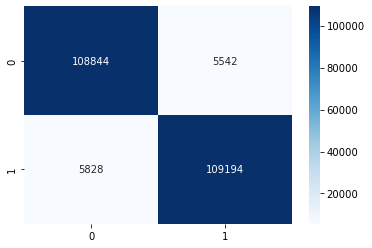

In [39]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='',cmap='Blues')

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95    114386
           1       0.95      0.95      0.95    115022

    accuracy                           0.95    229408
   macro avg       0.95      0.95      0.95    229408
weighted avg       0.95      0.95      0.95    229408



### There is approximately same accuracy with and without OneHotEncoding

### Performing Cross Validation

In [44]:
import numpy as np
clf_tree = DecisionTreeClassifier(criterion="entropy", max_depth=35, splitter="best",min_samples_leaf=4,min_samples_split=2)

start_time = timeit.default_timer()
clf_tree.fit(train_sc,y_train)
elapsed = timeit.default_timer() - start_time
print("Time taken to fit the model in sec is ",elapsed)

start_time = timeit.default_timer()
#perform k fold
cv_r2_scores_rf = cross_val_score(clf_tree, X, Y, cv=10,scoring='r2')
elapsed = timeit.default_timer() - start_time
print("Time taken to perform cv for the model in sec is ",elapsed)

print("Cv2 scores:",cv_r2_scores_rf)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_scores_rf)))

Time taken to fit the model in sec is  56.111048199999914
Time taken to perform cv for the model in sec is  645.5209166
Cv2 scores: [0.23134328 0.8711466  0.8668573  0.86996094 0.86985633 0.8692635
 0.87100599 0.87020392 0.87016905 0.86947159]
Mean 5-Fold R Squared: 0.8059278498099616
